In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
# 全部行都能輸出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# 刪除警告訊息
import warnings
warnings.filterwarnings('ignore')

c:\Users\Jeremy\Desktop\python\pp\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Jeremy\Desktop\python\pp\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\Jeremy\Desktop\python\pp\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
train_df = pd.read_csv("./Data/input/train.csv") 
test_df = pd.read_csv("./Data/input/test.csv")
train_df
test_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# 轉換Survived位子
pr = train_df["Survived"]
train_df.drop(labels=["Survived"], axis=1, inplace= True)
train_df.insert(len(train_df.columns), "Survived", pr)
train_df
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
all_df = pd.concat((train_df,test_df), axis=0, ignore_index=True)
all_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

<AxesSubplot:>

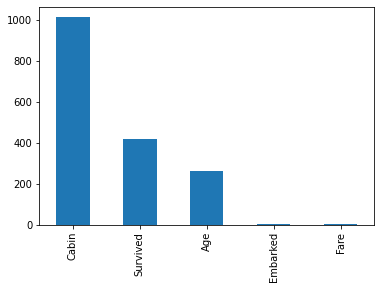

In [6]:
# 查看缺失值分布(直條圖)
missing = all_df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True, ascending=False)  # ascending=False(遞減排列)
missing
missing.plot.bar()

In [7]:
for val in all_df:
    print(all_df[val].value_counts())
    print("=================")

1       1
861     1
879     1
878     1
877     1
       ..
436     1
435     1
434     1
433     1
1309    1
Name: PassengerId, Length: 1309, dtype: int64
3    709
1    323
2    277
Name: Pclass, dtype: int64
Connolly, Miss. Kate                                     2
Kelly, Mr. James                                         2
Milling, Mr. Jacob Christian                             1
MacKay, Mr. George William                               1
Lennon, Miss. Mary                                       1
                                                        ..
Giles, Mr. Edgar                                         1
Montvila, Rev. Juozas                                    1
Persson, Mr. Ernst Ulrik                                 1
Theobald, Mr. Thomas Leonard                             1
Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lingrey")"    1
Name: Name, Length: 1307, dtype: int64
male      843
female    466
Name: Sex, dtype: int64
24.00    47
22.00    43
21.00    41
30.00    40
18

In [8]:
all_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


<AxesSubplot:xlabel='Survived', ylabel='count'>

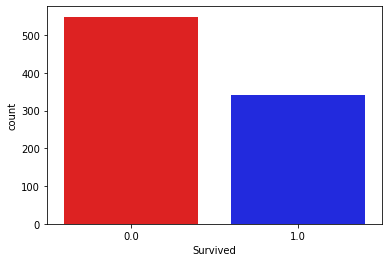

In [9]:
sns.countplot(all_df["Survived"], palette=['#fc0303','#030efc'])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

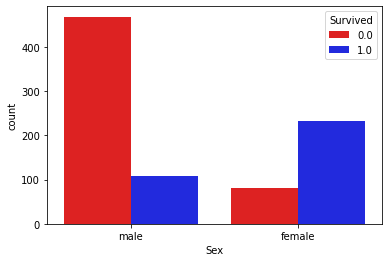

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
# 男女性的存活狀況
sns.countplot(all_df["Sex"], hue=all_df["Survived"], palette=['#fc0303','#030efc'])
plt.show()
all_df.groupby('Sex')[["Survived"]].mean()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

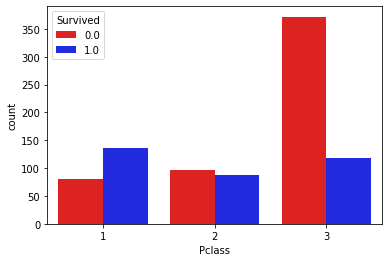

In [11]:
# 各艙等的存活狀況
sns.countplot(all_df["Pclass"], hue=all_df["Survived"], palette=['#fc0303','#030efc'])
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

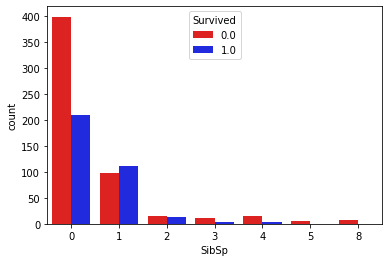

In [12]:
# SibSp(人際關係: Sibling=>兄弟姊妹等.. Spouse=>夫妻 的存活率!!! )
sns.countplot(all_df["SibSp"], hue=all_df['Survived'], palette=['#fc0303','#030efc'])
plt.show()

<AxesSubplot:xlabel='Parch', ylabel='count'>

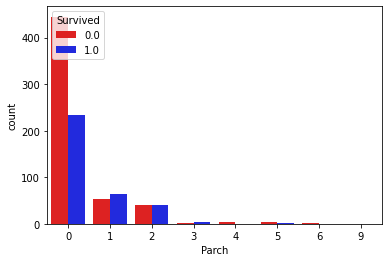

In [13]:
# 家條關係的存活率
sns.countplot(all_df["Parch"], hue=all_df['Survived'], palette=['#fc0303','#030efc'])
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

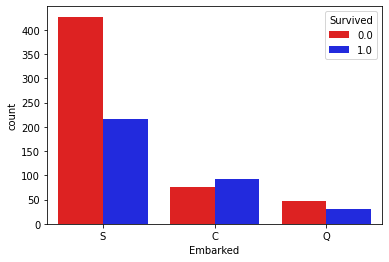

In [14]:
# 登船入口與存活比例
sns.countplot(all_df["Embarked"], hue=all_df['Survived'], palette=['#fc0303','#030efc'])
plt.show()

In [15]:
# 艙等,性別的存活率
all_df.pivot_table("Survived", index="Sex", columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [16]:
# 針對年紀,性別跟艙等計算存活率
age = pd.cut(all_df["Age"], [0,18,80])
all_df.pivot_table("Survived", ["Sex",age], "Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [17]:
all_df["Name"]

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [18]:
# 針對"Name"欄位計行處理(使用set自動去重)
name_titles = set()
for name in all_df["Name"]:
    name_titles.add(name.split(",")[1].split(".")[0].strip()) #.strip() => 方法用於移除字符串頭尾指定的字符（默認為空格或換行符）或字符格式。
print(name_titles)

{'Col', 'Miss', 'Major', 'Sir', 'Capt', 'Mlle', 'Ms', 'Rev', 'Lady', 'Mr', 'Mme', 'Jonkheer', 'Don', 'Mrs', 'the Countess', 'Dr', 'Dona', 'Master'}


In [19]:
# 創造轉換字典['Mr', 'Mrs', 'Miss', 'Master', 'Other'] => 轉換成這幾累
name_titles_dict = {'Ms':'Miss', 'Miss':'Miss', 'Major':'Other', 'Mlle':'Miss', 'the Countess':'Other', 'Col':'Other', 'Dona':'Other', 'Mr':'Mr', 'Mrs':'Mrs', 'Capt':'Other', 'Rev':'Other', 'Lady':'Miss', 'Don':'Other', 'Master':'Master', 'Jonkheer':'Other', 'Mme':'Mrs', 'Sir':'Mr', 'Dr':'Other'}

In [20]:
all_df["Title_name"] = all_df["Name"].map(lambda x: x.split(",")[1].split(".")[0].strip()).map(name_titles_dict)
all_df["Title_name"].unique()
all_df.drop(columns="Name", inplace=True)
all_df

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title_name
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,1.0,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,Mr
1305,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,Other
1306,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,Mr
1307,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,NaN,Mr


In [21]:
# 查看缺失值比例(評估各欄位缺失值)
la = []
for i in all_df.columns:
    lm = all_df[i].isnull().mean()
    if lm > 0:
        print(i,":",lm)
        la.append(i)
# 將需要欄位留下
#la.remove('LotFrontage')
#la.remove('SalePrice')
print(la)

Age : 0.20091673032849502
Fare : 0.0007639419404125286
Cabin : 0.774637127578304
Embarked : 0.0015278838808250573
Survived : 0.31932773109243695
['Age', 'Fare', 'Cabin', 'Embarked', 'Survived']


In [22]:
# 移除缺失直過大的欄位
all_df.drop(columns="Cabin", inplace=True)
all_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Title_name
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,0.0,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,1.0,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,Miss
3,4,1,female,35.0,1,0,113803,53.1000,S,1.0,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,S,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,NaN,0,0,A.5. 3236,8.0500,S,NaN,Mr
1305,1306,1,female,39.0,0,0,PC 17758,108.9000,C,NaN,Other
1306,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN,Mr
1307,1308,3,male,NaN,0,0,359309,8.0500,S,NaN,Mr


In [23]:
num_columns = []
nonnum_columns = []
for i1 in all_df.columns:
    if all_df[i1].dtypes == "object":
        nonnum_columns.append(i1)
    else:
        num_columns.append(i1)

print(num_columns)
print(nonnum_columns)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
['Sex', 'Ticket', 'Embarked', 'Title_name']


In [24]:
print("num_columns欄位的缺失值:")
for i3 in num_columns:
    a1 = all_df[i3].isnull().sum()
    if a1 > 0:
        print(i3,":",a1)

print("nonnum_columns欄位的缺失值:")
for i4 in nonnum_columns:
    a2 = all_df[i4].isnull().sum()
    if a2 > 0 :
        print(i4,":",a2) 

num_columns欄位的缺失值:
Age : 263
Fare : 1
Survived : 418
nonnum_columns欄位的缺失值:
Embarked : 2


In [25]:
# 處理Embarked欄位缺失值(眾數)
all_df["Embarked"] = all_df["Embarked"].fillna(all_df["Embarked"].mode()[0])
all_df["Embarked"].isnull().sum()

0

In [26]:
all_df["Sex"].unique()
all_df["Embarked"].unique()
all_df["Title_name"].unique()

array(['male', 'female'], dtype=object)

array(['S', 'C', 'Q'], dtype=object)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [27]:
# nonnum_columns欄位,做LabelEncoding
all_df["Sex"] = all_df["Sex"].map({'male':1, 'female':0})
all_df["Embarked"] = all_df["Embarked"].map({'S':0, 'C':1, 'Q':2})
all_df["Title_name"] = all_df["Title_name"].map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Other':5})

In [28]:
# 把Ticket欄位刪除(沒用!!)
all_df.drop(columns="Ticket", inplace=True)
all_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title_name
0,1,3,1,22.0,1,0,7.2500,0,0.0,1
1,2,1,0,38.0,1,0,71.2833,1,1.0,2
2,3,3,0,26.0,0,0,7.9250,0,1.0,3
3,4,1,0,35.0,1,0,53.1000,0,1.0,2
4,5,3,1,35.0,0,0,8.0500,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,NaN,0,0,8.0500,0,NaN,1
1305,1306,1,0,39.0,0,0,108.9000,1,NaN,5
1306,1307,3,1,38.5,0,0,7.2500,0,NaN,1
1307,1308,3,1,NaN,0,0,8.0500,0,NaN,1


In [29]:
# 處理Fare欄位缺失值(均值)
all_df["Fare"] = all_df["Fare"].fillna(all_df["Fare"].mean())
all_df["Fare"].isnull().sum()

0

In [30]:
# 處理Age欄位缺失值(??)
men_age_mean = all_df[all_df["Sex"] == 0]["Age"].mean()
female_age_mean = all_df[all_df["Sex"] == 1]["Age"].mean()

In [31]:
all_df.loc[ (all_df["Age"].isnull())&(all_df["Sex"]==1) , "Age" ] = men_age_mean
all_df.loc[ (all_df["Age"].isnull())&(all_df["Sex"]==0) , "Age" ]  = female_age_mean
all_df["Age"].isnull().sum()

0

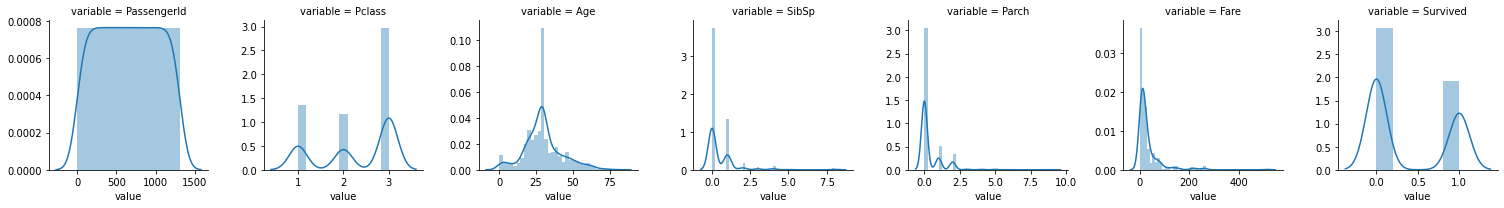

In [32]:
# 針對num_columns欄位評估數據分布狀況!!!
f = pd.melt(all_df, value_vars=num_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=7, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [33]:
# 欄位值轉換(val-min/max-min)
all_df["Age"] =  (all_df["Age"]-min(all_df["Age"])) / (max(all_df["Age"])-min(all_df["Age"])) 
all_df["Fare"] =  (all_df["Fare"]-min(all_df["Fare"])) / (max(all_df["Fare"])-min(all_df["Fare"]))
all_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title_name
0,1,3,1,0.273456,1,0,0.014151,0,0.0,1
1,2,1,0,0.473882,1,0,0.139136,1,1.0,2
2,3,3,0,0.323563,0,0,0.015469,0,1.0,3
3,4,1,0,0.436302,1,0,0.103644,0,1.0,2
4,5,3,1,0.436302,0,0,0.015713,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0.357223,0,0,0.015713,0,NaN,1
1305,1306,1,0,0.486409,0,0,0.212559,1,NaN,5
1306,1307,3,1,0.480145,0,0,0.014151,0,NaN,1
1307,1308,3,1,0.357223,0,0,0.015713,0,NaN,1


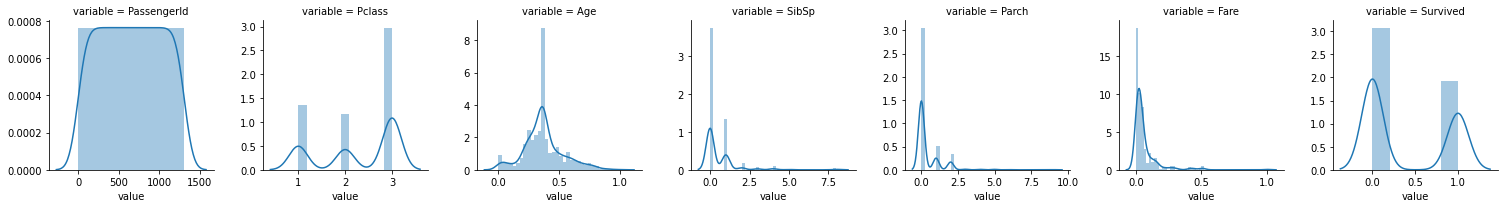

In [34]:
# 針對num_columns欄位評估數據分布狀況!!!
f1 = pd.melt(all_df, value_vars=num_columns)
g1 = sns.FacetGrid(f1, col="variable",  col_wrap=7, sharex=False, sharey=False)
g1 = g1.map(sns.distplot, "value")

In [35]:
# 確認是否存在重複數據
duplicate = all_df.duplicated().sum()
print(duplicate)
#all_df.drop_duplicates() # 如果有重複數據在執行這一條

0


In [36]:
# 轉換Survived位子
su = all_df["Survived"]
all_df.drop(columns="Survived", axis=1, inplace=True)
all_df.insert(len(all_df.columns), "Survived", su)
all_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_name,Survived
0,1,3,1,0.273456,1,0,0.014151,0,1,0.0
1,2,1,0,0.473882,1,0,0.139136,1,2,1.0
2,3,3,0,0.323563,0,0,0.015469,0,3,1.0
3,4,1,0,0.436302,1,0,0.103644,0,2,1.0
4,5,3,1,0.436302,0,0,0.015713,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0.357223,0,0,0.015713,0,1,NaN
1305,1306,1,0,0.486409,0,0,0.212559,1,5,NaN
1306,1307,3,1,0.480145,0,0,0.014151,0,1,NaN
1307,1308,3,1,0.357223,0,0,0.015713,0,1,NaN


In [37]:
corr_drop = all_df.corr().iloc[-1,:] 
corr_drop

PassengerId   -0.005007
Pclass        -0.338481
Sex           -0.543351
Age           -0.061633
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.106811
Title_name     0.401610
Survived       1.000000
Name: Survived, dtype: float64

<Figure size 864x648 with 0 Axes>

<AxesSubplot:>

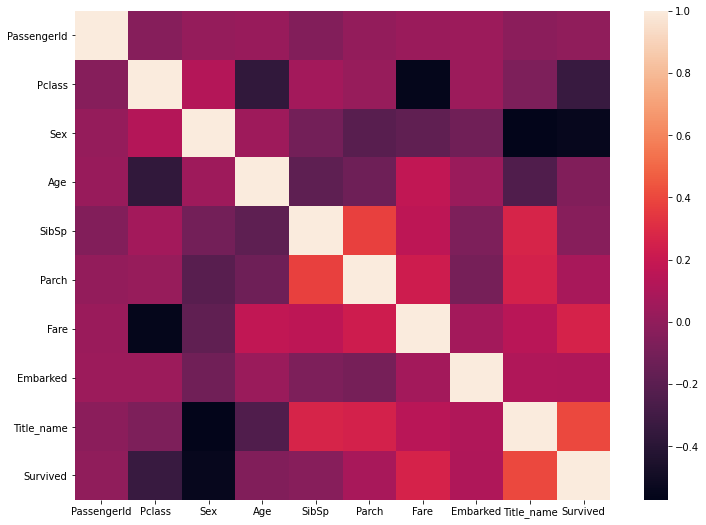

In [38]:
plt.figure(1, figsize=(12,9))
sns.heatmap(all_df.corr())

In [39]:
train_df.index[-1]

890

In [46]:
new_train_df = pd.DataFrame()
new_test_df = pd.DataFrame()

new_train_df = all_df.iloc[train_df.index]
new_test_df = all_df.iloc[train_df.index[-1]+1:,:-1]
new_train_df
new_test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_name,Survived
0,1,3,1,0.273456,1,0,0.014151,0,1,0.0
1,2,1,0,0.473882,1,0,0.139136,1,2,1.0
2,3,3,0,0.323563,0,0,0.015469,0,3,1.0
3,4,1,0,0.436302,1,0,0.103644,0,2,1.0
4,5,3,1,0.436302,0,0,0.015713,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,0.336089,0,0,0.025374,0,5,0.0
887,888,1,0,0.235876,0,0,0.058556,0,3,1.0
888,889,3,0,0.381000,1,2,0.045771,0,3,0.0
889,890,1,1,0.323563,0,0,0.058556,1,1,1.0


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_name
891,892,3,1,0.430039,0,0,0.015282,2,1
892,893,3,0,0.586622,1,0,0.013663,0,2
893,894,2,1,0.774521,0,0,0.018909,2,1
894,895,3,1,0.336089,0,0,0.016908,0,1
895,896,3,0,0.273456,1,1,0.023984,0,2
...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,0.357223,0,0,0.015713,0,1
1305,1306,1,0,0.486409,0,0,0.212559,1,5
1306,1307,3,1,0.480145,0,0,0.014151,0,1
1307,1308,3,1,0.357223,0,0,0.015713,0,1


In [49]:
new_train_df.to_csv("./Data/output/train_ETL.csv", index=False)
new_test_df.to_csv("./Data/output/test_ETL.csv", index=False)